In [1]:
%matplotlib inline

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc

import os
import random
import pickle




In [2]:
imageFolder = "-images"

image_dim = 3 #RGB

imgs = {}

for fileName in ["Cairo_North_2000.jpg", "Cairo_North_2005.jpg", "Cairo_North_2010.jpg", "Cairo_North_2016.jpg"]:
#for fileName in ["North_2000_R.jpg", "North_2005_R.jpg", "North_2010_R.jpg", "North_2016_R.jpg"]:
    img = misc.imread("/".join([imageFolder, fileName]))

    if image_dim == 1 and len(img.shape) > 2: 
        img = img[:,:,0]
        
    img = img / 255.0
    imgs[fileName] = img

print "Load data complete"

Load data complete


In [3]:
img = imgs["Cairo_North_2000.jpg"]
print "image dimensions:", img.shape

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

image dimensions: (2789, 4800, 3)


MemoryError: 

In [4]:
import math

targetRes = 10

img = imgs["Cairo_North_2000.jpg"]
xStep = int( math.floor( float(img.shape[0]) / targetRes ) )
yStep = int( math.floor( float(img.shape[1]) / targetRes ) )

data = []

for y in range(yStep):
    for x in range(xStep):
        
        sample = []
        
        crop = imgs["Cairo_North_2000.jpg"][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
        sample.append(crop)

        for layer in ["Cairo_North_2005.jpg", "Cairo_North_2010.jpg", "Cairo_North_2016.jpg"]:
            target = imgs[layer][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes]
            target_val = int ( round( np.mean(target) ) )
            sample.append(target_val)

        data.append(sample)

image dimensions: (10, 10, 3)
Value at time 0: 0
Value at time 1: 0
Value at time 2: 0


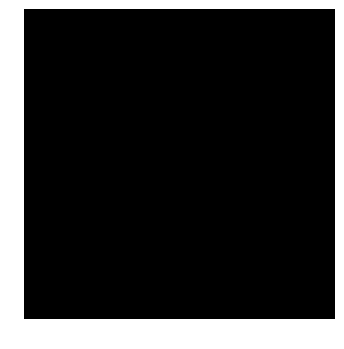

In [ ]:
img_index = 10


img = data[img_index][0]
print "image dimensions:", img.shape
print "Value at time 0:", (data[img_index][1])
print "Value at time 1:", (data[img_index][2])
print "Value at time 2:", (data[img_index][3])

imshow(img, cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
plt.axis('off')
plt.show()

In [ ]:
recomp = {}

for i, layer in enumerate(["Cairo_North_2005.jpg", "Cairo_North_2010.jpg", "Cairo_North_2016.jpg"]):

    recomp[layer] = np.ndarray((targetRes * xStep, targetRes * yStep), dtype=np.float32)

    for y in range(yStep):
        for x in range(xStep):
            recomp[layer][x * targetRes : (x + 1) * targetRes, y * targetRes : (y + 1) * targetRes] = data[ y * xStep + x ][i+1]

        
for layer in ["Cairo_North_2005.jpg", "Cairo_North_2010.jpg", "Cairo_North_2016.jpg"]:
    print "image dimensions:", img.shape
    print layer
    imshow(recomp[layer], cmap = plt.get_cmap('gray'), vmin = 0, vmax = 1,  interpolation='nearest')
    plt.axis('off')
    plt.show()

image dimensions: (10, 10, 3)
Cairo_North_2005.jpg


MemoryError: 

In [ ]:
image_size = 10
image_dim = 3 #RGB

X = np.ndarray((len(data), image_size, image_size, image_dim), dtype=np.float32)
y = np.ndarray((len(data), 1), dtype=np.int32)

for i, d in enumerate(data):
    X[i] = d[0]
    y[i] = d[1]

In [ ]:
random.shuffle(data)

trainingSplit = int(.7 * X.shape[0])

X_train = X[:trainingSplit]
y_train = y[:trainingSplit]
X_test = X[trainingSplit:]
y_test = y[trainingSplit:]

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 50.0
X_test /= 50.0

In [ ]:
#Pickle file

pickle_file = imageFolder + '.pickle'

try:
    f = open(pickle_file, 'wb')
    save = {
        'X_train': X_train,
        'y_train': y_train,
        'X_test': X_test,
        'y_test': y_test,
    }
    pickle.dump(save, f, pickle.HIGHEST_PROTOCOL)
    f.close()
except Exception as e:
    print 'Unable to save data to', pickle_file, ':', e
    raise
    
statinfo = os.stat(pickle_file)
print 'Saved data to', pickle_file
print 'Compressed pickle size:', statinfo.st_size